In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
# import umap
import json
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import pickle
import re
import random
import nltk

sns.set()

In [2]:
nltk.download('stopwords', quiet=True)

True

# Using Yummy Data to Explore Food in Vector Space!

My friend and I had a funny question (in the days before ChatGPT existed): if we let primitive NLP models cook, what recipes would they make?
We started off with an EDA to look at what recipes look like if we look at it from a vectorized perspective - the results surprised us!

At the time (early in my university career), I was just starting to learn NLP techniques, so we elected to process our words with introductory NLP methods. I also didnt know what spaCy or NLTK was at the time, so I did some processing manually. I am thankfully now both older and wiser.

## Preprocessing the Data

In [3]:
DATA_PATH = "./data/recipes_raw_nosource_fn.json"

In [4]:
data = pd.read_json(DATA_PATH)
data = data.drop(['picture_link'])
data = data.dropna(axis=1)

In [5]:
data

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque


And here are the ingredients for one such recipe. Note the numbers and measurements, which we will remove to simplify our EDA.

In [6]:
data.loc['ingredients'][10]

C:\Users\sayan\AppData\Local\Temp\ipykernel_20764\910867606.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.loc['ingredients'][10]


['3 to 4 cups chicken stock, preferably homemade, recipe follows',
 '1 quart Roasted Winter Vegetables, recipe follows',
 'Kosher salt and freshly ground black pepper',
 '3 (5-pound) roasting chickens',
 '3 large yellow onions, unpeeled, quartered',
 '6 carrots, unpeeled, halved',
 '4 celery stalks with leaves, cut in thirds',
 '4 parsnips, unpeeled, cut in 1/2, optional',
 '20 sprigs fresh parsley',
 '15 sprigs fresh thyme',
 '20 sprigs fresh dill',
 '1 head garlic, unpeeled, cut in 1/2 crosswise',
 '2 tablespoons kosher salt',
 '2 teaspoons whole black peppercorns',
 '1 pound carrots, peeled',
 '1 pound parsnips, peeled',
 '1 large sweet potato, peeled',
 '1 small butternut squash (about 2 pounds), peeled and seeded',
 '3 tablespoons good olive oil',
 '1 1/2 teaspoons kosher salt',
 '1/2 teaspoon freshly ground black pepper',
 '2 tablespoons chopped fresh flat-leaf parsley']

Removing measurements:

In [7]:
punctuation = r"""!"#$%&*+,-.:;<=>?@[\]^_`{|}()~1234567890/"""
punc_re = re.compile("[%s]|ounces|ounce|can|cans|cups|pounds|pound|cup|cups|tablespoons|tablespoon|teaspoons|teaspoon|inch|cm|one|two|three|serving|servings" % punctuation)
for ind, item in data.items():
    new_ingredients = []
    if type(item['ingredients']) == np.float64:
        data = data.drop(ind, axis=1)
        print(item['ingredients'])
    else:
        for ingredient in item['ingredients']:
            new_ingredient = punc_re.sub("", ingredient)
            new_ingredient = new_ingredient.lower()
            new_ingredients += [new_ingredient]
        data.at["ingredients", ind] = new_ingredients

In [8]:
data

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[ celery finely chopped, small green pepper ...","[ skirt steak cut into dice, kosher salt and...","[ dried black beans picked over and rinsed, ...","[ ground chuck, one tomato sauce, salt, ...","[ rice brown mediumgrain cooked, quinoa, sw...","[ extravirgin olive oil, baby italian eggpla...","[ lightly crumbled saffron threads, sugar, ...",[ topsliced hotdog buns or fashion your own to...,"[ green or red bell peppers, olive oil, oni...",[ medium head cauliflower about cut into bit...,...,"[ice, slice jalapeno seeded by piece, fres...","[ butter, sugar, ground cinnamon, large ...","[ coconut milk, short stalk lemon grass fine...","[ large heads garlic, cutup chicken about , ...","[ sheet frozen puff pastry thawed, egg, wat...","[ ears fresh corn, heads belgian endive, ol...","[ large plum tomatoes, salt and sugar, zucc...","[ olive oil, unsalted butter, medium clove...","[ butter, bittersweet chocolate, whole egg...",[ s restaurantstyle condensed crab bisque rec...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque


In [9]:
data.loc['ingredients'][0]

C:\Users\sayan\AppData\Local\Temp\ipykernel_20764\3221995973.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.loc['ingredients'][0]


['  celery finely chopped',
 ' small green pepper finely chopped',
 '  finely sliced green onions',
 '  chopped parsley',
 '  crabmeat',
 '   coarsely crushed cracker crumbs',
 '  salt',
 '  dry mustard',
 'dash hot sauce',
 '  heavy cream',
 '  melted butter']

This will be much easier to work with!

## Initial EDA

### Word frequency

In [10]:
dict_of_words = {}

for ingredients in data.loc['ingredients',:]:
    for ingredient in ingredients:
        for word in ingredient.split():
            word = word.rstrip(",.")
            if not word in dict_of_words.keys():
                dict_of_words[word] = 1
            else:
                dict_of_words[word] += 1

In [11]:
df_words = pd.DataFrame.from_dict(dict_of_words, "index", columns=["count"])
df_words = df_words.sort_values('count', ascending=False)

In [12]:
print(df_words.head(100))

         count
and      61572
chopped  53817
salt     52539
pepper   45672
ground   38587
...        ...
rice      5009
ginger    4922
with      4877
yellow    4794
drained   4728

[100 rows x 1 columns]


In [13]:
# Showing the top n words and their counts ; yes I could use df.head() but the output is vertical and I want to maximize screen space
disp_n = 100
top_words_unproc = (df_words[0:].index.values)
words_str = ""
for i, word in enumerate(top_words_unproc[0:disp_n]):
    words_str += str(i+1) + ". " + word + " (" + str(df_words.loc[word]['count']) + ")  |  "
print(words_str)

1. and (61572)  |  2. chopped (53817)  |  3. salt (52539)  |  4. pepper (45672)  |  5. ground (38587)  |  6. oil (38280)  |  7. fresh (37210)  |  8. or (32433)  |  9. for (29698)  |  10. sugar (28469)  |  11. freshly (27545)  |  12. black (25904)  |  13. butter (24818)  |  14. olive (22777)  |  15. sliced (22674)  |  16. garlic (22615)  |  17. to (21578)  |  18. large (21136)  |  19. red (18900)  |  20. into (18738)  |  21. kosher (18198)  |  22. cut (18137)  |  23. leaves (17779)  |  24. finely (17752)  |  25. flour (15841)  |  26. juice (15299)  |  27. plus (15293)  |  28. onion (15261)  |  29. cream (14956)  |  30. minced (14756)  |  31. white (14545)  |  32. diced (14271)  |  33. peeled (13819)  |  34. cloves (13692)  |  35. lemon (13586)  |  36. sauce (13130)  |  37. of (12950)  |  38. grated (12831)  |  39. unsalted (12416)  |  40. water (11986)  |  41. small (11890)  |  42. about (11801)  |  43. cheese (11725)  |  44. chicken (11573)  |  45. powder (11153)  |  46. vinegar (10022

I am surprised that conjunction words didn't rank higher! Of course, 'and' ranked as highest but the second-highest, 'or' only ranks 8th. We actually wanted to keep the conjunction words for later on, to potentially understand actions being performed on the ingredient (ie 'lemon and orange' vs 'lemon or orange'). For PCA analysis we'll want to remove these stop words though.

[Text(0.5, 1.0, 'Frequency Distribution of Words'),
 Text(0.5, 0, 'Word'),
 Text(0, 0.5, 'Count')]

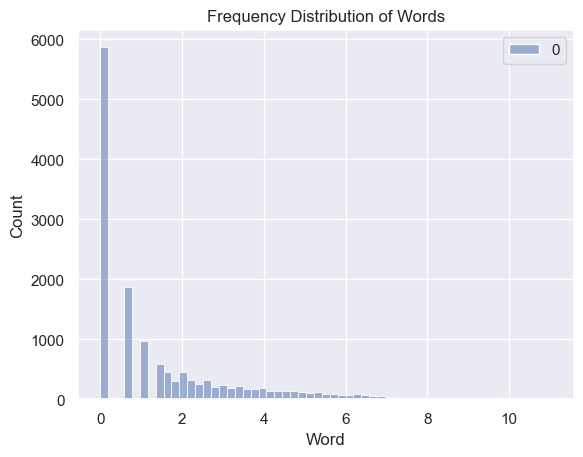

In [14]:
sns.histplot(np.log(df_words.values), kde=False).set(title='Frequency Distribution of Words', xlabel='Word', ylabel='Count')


### (Modified) Bag-of-Words

Now let's make a bag of words out of this. We actually did a modified bag-of-words approach, only noting the presence of the word and not the count. This is because we figured ingredients lists should mostly be unique in the first place, and words that would repeat would probably not be particularly important (ie: conjunctions, adjectives, etc). This approach is incredibly naive but still led to really interesting results for the EDA! A much better approach would be to use word vector models or LLMs - this is something I might do if I revist this project properly in the future!

First, filtering out stop words:

In [15]:
# What stop-words are there in the top words?
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

print_str = ""
for word in top_words_unproc:
    if word in stop_words:
        print_str += word + " | "
print_str

"and | or | for | to | into | of | about | in | more | the | as | a | with | at | such | from | on | if | each | s | very | other | only | not | your | by | all | it | few | you | any | an | until | but | then | be | over | some | is | off | out | up | through | below | i | their | no | above | do | are | just | will | have | before | both | too | this | than | that | them | so | re | how | own | under | down | they | should | most | it's | between | same | we | which | t | don't | m | when | after | again | against | been | these | here | my | o | its | while | can | won | d | has | during | once | there | won't | because | where | you'll | you're | doesn't | what | those | you'd | yourself | our | you've | does | don | they're | were | aren't | me | isn't | being | i'll | y | ours | now | i'm | was | am | they'll | i've | ve | we've | did | i'd | didn't | having | we're | doing | ma | shan | nor | they've | "

Sanity check confirms we aren't accidentally including any ingredients in the stop words. This is good.

In [16]:
top_words = [word for word in top_words_unproc if word not in stop_words]

In [17]:
zero_data = np.zeros(shape=(len(data.T), len(list(top_words))))
final_data = pd.DataFrame(zero_data, columns=list(top_words))

In [18]:
top_words_set = set(top_words)
i = 0
for ingredients in data.loc['ingredients',:]:
    bigset = set()
    for ingredient in ingredients:
        bigset.update(ingredient.split())
    for ingredient in top_words_set.intersection(bigset):
        final_data.loc[i,ingredient] = 1
    if (i % 2000 == 0):
        print(bigset)
    i += 1

{'sauce', 'heavy', 'finely', 'celery', 'pepper', 'small', 'sliced', 'mustard', 'green', 'coarsely', 'crumbs', 'dry', 'hot', 'cracker', 'parsley', 'crushed', 'butter', 'melted', 'cream', 'chopped', 'salt', 'crabmeat', 'dash', 'onions'}
{'frying', 'finely', 'about', 'wedges', 'peppers', 'grated', 'fingers', 'crumbled', 'half', 'vinegar', 'extravirgin', 'juice', 'parmesan', 'leaves', 'mix', 'for', 'slices', 'between', 'cucumber', 'dried', 'olive', 'parsley', 'lemon', 'cheese', 'and', 'kosher', 'mint', 'vegetable', 'falafel', 'tahini', 'your', 'wine', 'feta', 'red', 'roasted', 'a', 'of', 'oil', 'chopped', 'salt', 'rubbed'}
{'sour', 'bacon', 'celery', 'optional', 'grated', 'lima', 'crumbled', 'onion', 'pepper', 'cored', 'sliced', 'parmesan', 'peeled', 'chicken', 'plating', 'for', 'carrot', 'olive', 'black', 'broth', 'fully', 'and', 'butter', 'apple', 'ground', 'pitted', 'freshly', 'cream', 'oil', 'salt', 'cooked', 'thawed', 'beans', 'diced'}
{'heads', 'nicoise', 'cranberries', 'into', 'jica

Now we have a bag-of-words representation of each recipe's ingredients!

In [19]:
# pickle.dump(final_data, open( "final_data.p", "wb" ))
final_data

,chopped,salt,pepper,ground,oil,fresh,sugar,freshly,black,butter,...,grainsweetened,callets,douglas,alpha,halfdried,secrets,blondies,cayennne,tripolini,kojuchang
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59623,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59624,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59625,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA Time!

Let's explore what the vector space of these ingredients looks like! I'm especially curious about what the principal components will be and what they will represent! Note that the input is a one-hot encoding so we don't need to standardize.

In [20]:
pca = PCA(n_components=2)
pcaed = pca.fit_transform(final_data)

In [21]:
pcaed.shape

(59628, 2)

In [22]:
def pca_top_words_to_str(pca: PCA, top_words:list, axis: int, num_words: int, type:str=None) -> str:
    if type=='pos':
        top_comps = np.argsort(pca.components_[axis]*-1.0) # np argsort sorts from smallest to largest, so *-1 to flip order
    elif type=='neg':
        top_comps = np.argsort(pca.components_[axis])
    else:
        top_comps = np.argsort(np.square(pca.components_[axis])*-1.0)
    
    axis_str = "AXIS " + str(axis+1) + ": "

    for i in range(num_words):
        axis_str += top_words[top_comps[i]] + ", "
    
    return axis_str

In [23]:
print("Top Positive Components")
print(pca_top_words_to_str(pca, top_words, 0, 50, type='pos'))
print(pca_top_words_to_str(pca, top_words, 1, 50, type='pos'))

print("\nTop Negative Components")
print(pca_top_words_to_str(pca, top_words, 0, 50, type='neg'))
print(pca_top_words_to_str(pca, top_words, 1, 50, type='neg'))

print("\nTop Components Overall (absolute value)")
print(pca_top_words_to_str(pca, top_words, 0, 50))
print(pca_top_words_to_str(pca, top_words, 1, 50))

Top Positive Components
AXIS 1: pepper, oil, black, freshly, garlic, ground, olive, chopped, salt, fresh, onion, cloves, red, leaves, kosher, sliced, minced, extravirgin, parsley, tomatoes, finely, chicken, wine, peeled, vinegar, diced, small, cut, white, medium, thyme, thinly, grated, sauce, stock, green, cilantro, dried, seeded, basil, onions, tomato, bell, celery, bay, large, mustard, clove, yellow, dry, 
AXIS 2: butter, flour, unsalted, allpurpose, salt, sugar, large, eggs, baking, ground, vanilla, plus, powder, extract, cream, egg, milk, kosher, freshly, room, temperature, granulated, chopped, brown, stick, heavy, grated, soda, recipe, follows, sticks, cinnamon, melted, p, whole, pure, finely, cut, confectirs', black, chocolate, light, softened, beaten, pieces, packed, vegetable, nutmeg, dusting, fine, 

Top Negative Components
AXIS 1: sugar, vanilla, extract, cream, chocolate, butter, flour, baking, milk, eggs, unsalted, egg, allpurpose, soda, granulated, ice, cinnamon, heavy, ro

In [24]:
print(np.sort(pca.components_[0]))
print(np.sort(pca.components_[1]))

[-0.15906194 -0.12098242 -0.0903198  ...  0.2349608   0.25862316
  0.3053635 ]
[-0.03576096 -0.02684043 -0.02375517 ...  0.26167307  0.32247002
  0.34445049]


#### 2-component PCA differentiates between Desserts and Savoury Dishes!

So this is very interesting! We printed out the top words that positively contribute to the top 2 principal components, and it differentiates between desserts and savoury dishes! Furthermore, when we look at top words that negatively contribute, we still see this differentiation. Curiously, even if we look at top words overall (sorted by overall magnitude), the results we see largely match with positive sort. Note that the magnitude of words with positive associations with each component tend to be larger than that of negatively associated words, which suggests these two components are defined moreso by what they are versus what they're not.

[Text(0.5, 1.0, 'PCA of Recipe BoW Distinguishes Btn Desserts and Savoury Foods'),
 Text(0.5, 0, 'Sweet'),
 Text(0, 0.5, 'Savoury')]

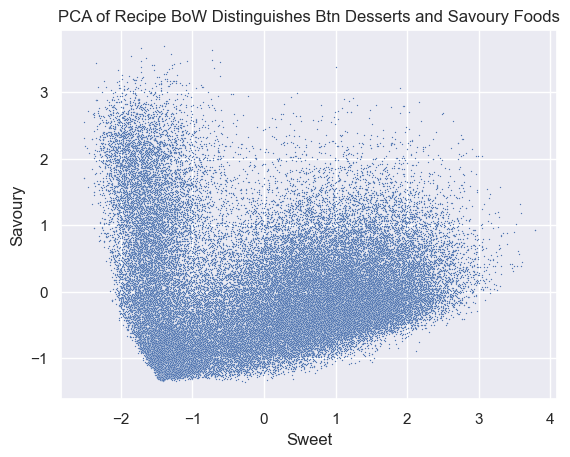

In [25]:
sns.scatterplot(x=pcaed[:, 0], y=pcaed[:, 1], s=1
                ).set(title='PCA of Recipe BoW Distinguishes Btn Desserts and Savoury Foods',
                      xlabel="Sweet",
                      ylabel="Savoury")

Visually, this looks like a quite clear separation! Let's use a scree plot to visualize the amount of variance additional components account for:

In [26]:
pca_scree = PCA(n_components=50)
pcaed_scree = pca_scree.fit_transform(final_data)

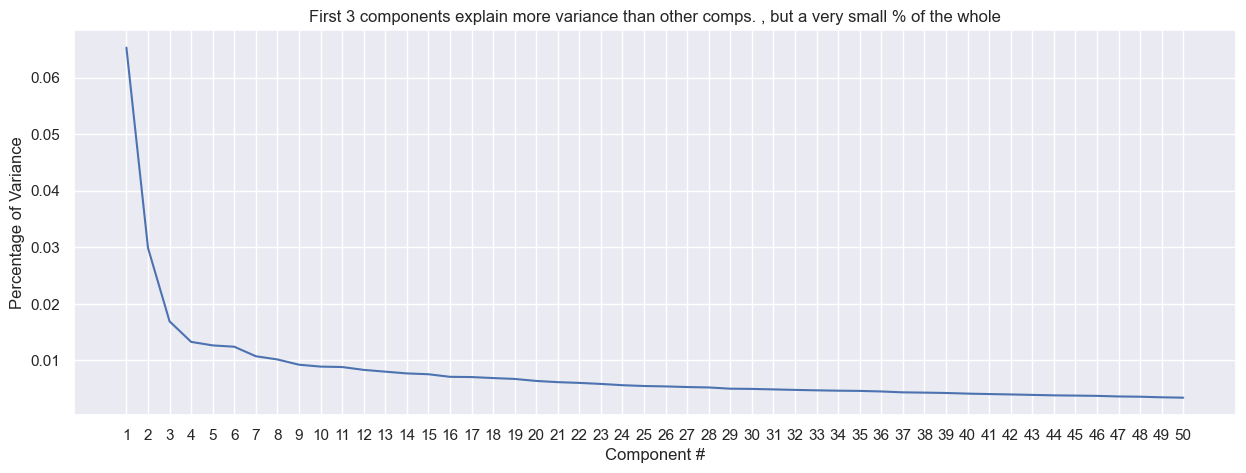

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(x=np.arange(pca_scree.n_components_)+1, y=pca_scree.explained_variance_ratio_).set(
    title='First 3 components explain more variance than other comps. , but a very small % of the whole',
    xlabel="Component #",
    ylabel="Percentage of Variance",
    xticks=np.arange(pca_scree.n_components_)+1);

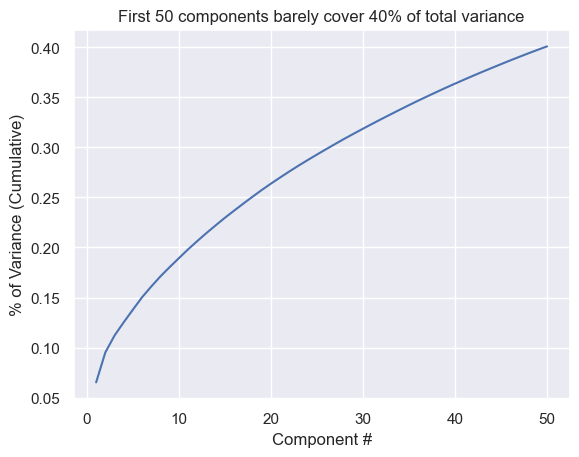

In [28]:
sns.lineplot(x=np.arange(pca_scree.n_components_)+1, y=np.cumsum(pca_scree.explained_variance_ratio_)).set(
    title='First 50 components barely cover 40% of total variance',
    xlabel="Component #",
    ylabel="% of Variance (Cumulative)");

In [29]:
len(top_words)

14464

This makes sense - with almost 14,500 features, and with data as complex as recipes, we can't expect to explain away the variance between all recipes in only two or three components.

In [30]:

for i in range(pca_scree.n_components_):
    print("Pos:  " + pca_top_words_to_str(pca_scree, top_words, i, 50, type='pos'))
    print("Neg:  " + pca_top_words_to_str(pca_scree, top_words, i, 50, type='neg'))
    print("Ovrl: " + pca_top_words_to_str(pca_scree, top_words, i, 50))
    print('\n')

Pos:  AXIS 1: pepper, oil, black, freshly, garlic, ground, olive, chopped, salt, fresh, onion, cloves, red, leaves, kosher, sliced, minced, extravirgin, parsley, tomatoes, finely, chicken, wine, peeled, vinegar, diced, small, cut, white, medium, thyme, thinly, grated, sauce, stock, green, cilantro, dried, seeded, basil, onions, tomato, bell, celery, bay, large, mustard, clove, yellow, dry, 
Neg:  AXIS 1: sugar, vanilla, extract, cream, chocolate, butter, flour, baking, milk, eggs, unsalted, egg, allpurpose, soda, granulated, ice, cinnamon, heavy, room, temperature, confectirs', sticks, pure, melted, syrup, powder, cocoa, brown, stick, softened, semisweet, powdered, yolks, cake, whipped, light, unsweetened, liqueur, strawberries, whites, chips, rum, orange, dark, bittersweet, sweetened, dusting, raspberries, almond, sifted, 
Ovrl: AXIS 1: pepper, oil, black, freshly, garlic, ground, olive, chopped, salt, fresh, sugar, onion, cloves, red, leaves, kosher, vanilla, sliced, minced, extravir

#### PCA 3rd Dimension: Salt, Pepper, Condiments?
I'm curious as to what this third component represents. Let's plot the magnitudes of each feature (words) for the third component to better understand this dimension:

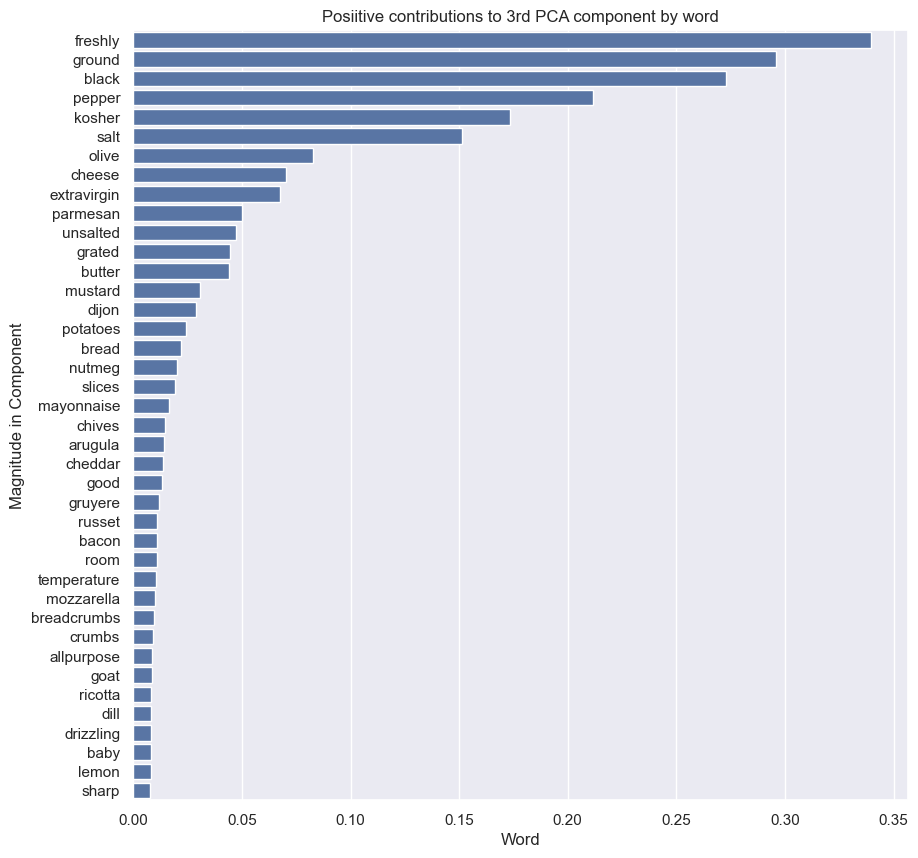

In [38]:
plt.figure(figsize=(10,10))

num_plot_words = 40
sns.barplot(
    y=[top_words[i] for i in np.argsort(pca_scree.components_[2]*-1.0)[:num_plot_words]],
    x=(np.sort(pca_scree.components_[2]*-1.0)*-1.0)[:num_plot_words],
    orient='y'
).set(
    title='Posiitive contributions to 3rd PCA component by word',
    xlabel="Word",
    ylabel="Magnitude in Component",
);

This is incredibly interesting. 'Freshly', 'ground', 'black', 'pepper' are the top terms, and yet pepper doesn't posess the largest contribution to this vector. We observe a similar phenomenon with 'kosher' and 'salt'. Note that in cuisine, the word 'pepper' discriminates by flavour, and even then it doesn't do this particularly well (black pepper, white pepper, bell peppers, and jalepino peppers have wildly different spice levels and use cases). But the fact that 'freshly ground black' contributes more to the vector than 'pepper', and 'kosher' contributes more than 'salt'. Compare this to mustard, which contributes more than dijon.

Also note that after Dijon mustard, the words don't really contribute much positively to the vector.

Are you thinking what I'm thinking? (finishing ingredients like salt/pepper, vs core ingredients like sliced vegetables!) We'll need to plot the negative word associations to confirm my hypothesis.

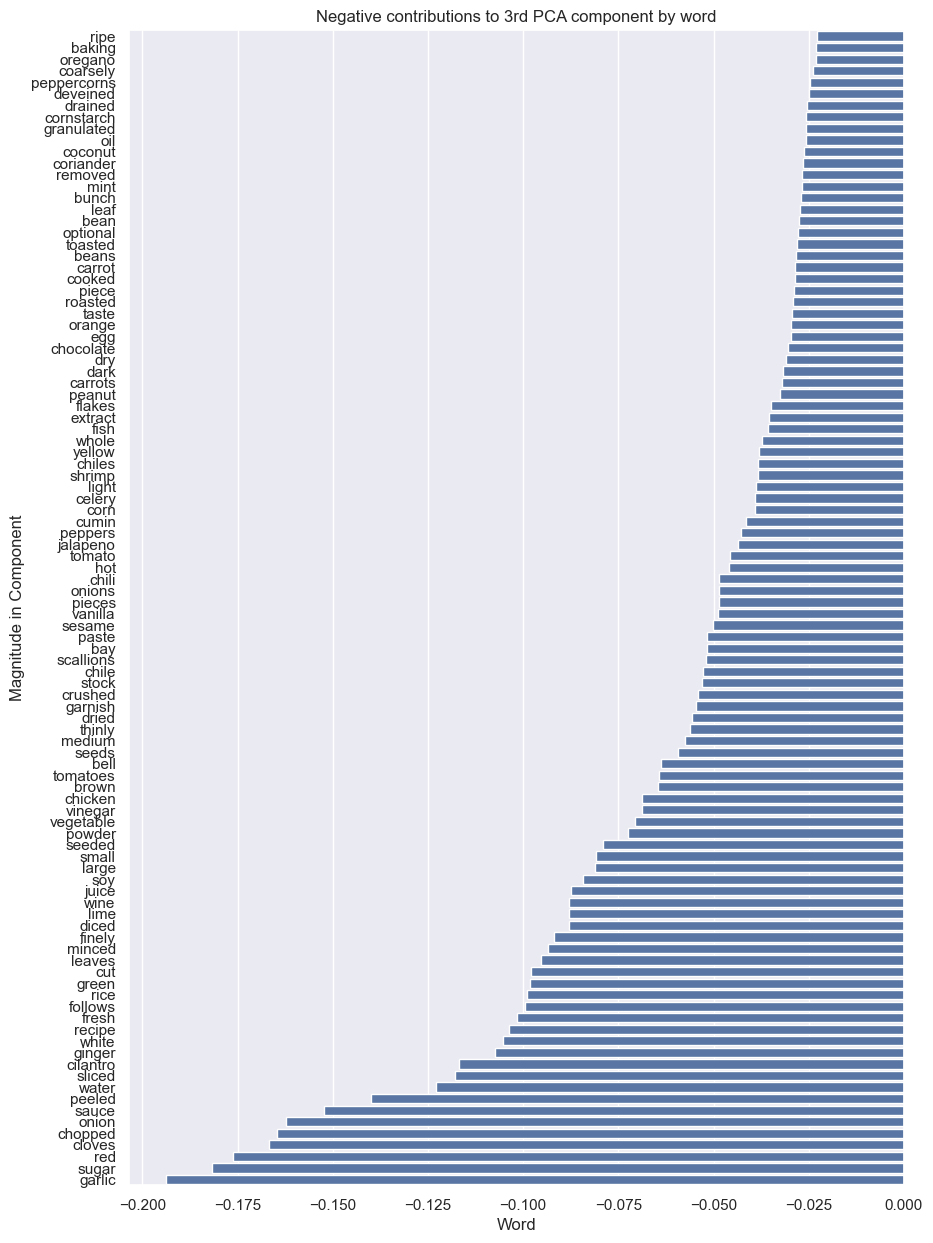

In [39]:
plt.figure(figsize=(10,15))

num_plot_words = 100
sns.barplot(
    y=[top_words[i] for i in np.argsort(pca_scree.components_[2]*-1.0)[-num_plot_words:]],
    x=(np.sort(pca_scree.components_[2]*-1.0)*-1.0)[-num_plot_words:],
    orient='y'
).set(
    title='Negative contributions to 3rd PCA component by word',
    xlabel="Word",
    ylabel="Magnitude in Component",
);

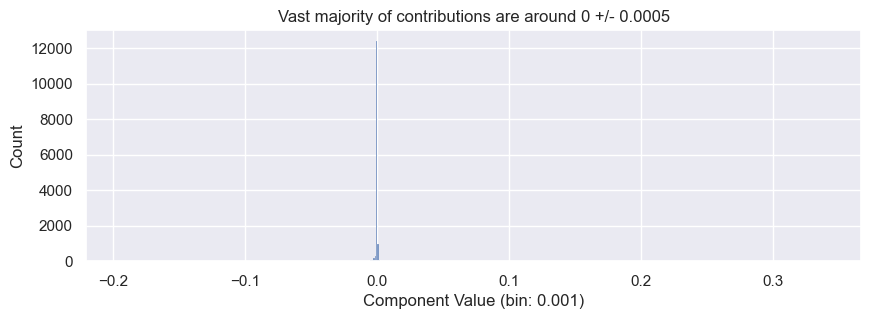

In [105]:
plt.figure(figsize=(10,3))

sns.histplot(pca_scree.components_[2], binwidth=0.001).set(
    title='Vast majority of contributions are around 0 +/- 0.0005',
    xlabel="Component Value (bin: 0.001)",
    ylabel="Count",
);

We can see that the distribution may be skewed towardsnegative contributions. Let's zoom in to investigate further by filtering out a bin of 0.005 around 0:

In [101]:
bin = 0.0025
comp_without_zero = pca_scree.components_[2][np.where((pca_scree.components_[2]>bin) | (pca_scree.components_[2]<-1.*bin))]

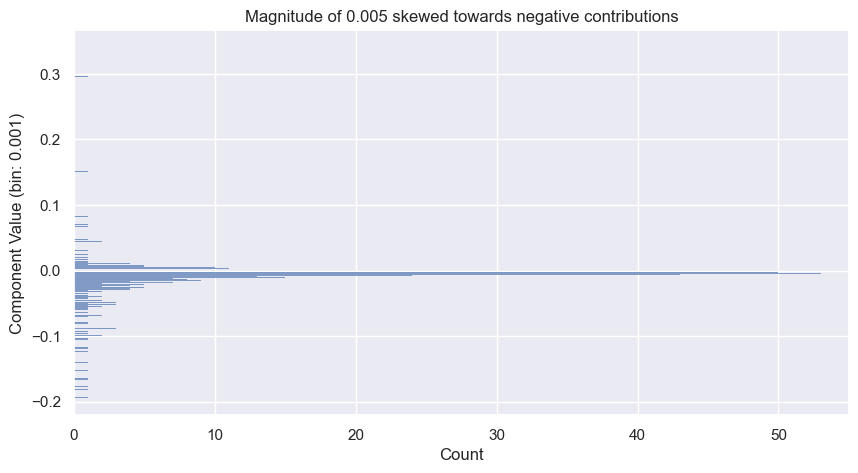

In [104]:
plt.figure(figsize=(10,5))
sns.histplot(y=comp_without_zero, binwidth=0.001).set(
    title='Magnitude of 0.005 skewed towards negative contributions',
    ylabel="Component Value (bin: 0.001)",
    xlabel="Count",
    xlim=(0,55)
);

The negative contributions are very telling. I plotted the top 100 words by negative contribution instead of the top 40 I did earlier. The 100th highest word by magnitide of negative contribution still has the same magnitude as the 15th highest word by positive contribution (Dijon). This component seems to be far more defined by what it's not versus what it is. Contrast this to the first two dimensions, which were defined moreso by what they are. This is backed up by the plot above, showing the distribution of component magnitudes being skewed towards negative contributions.

My hypothesis is that this component discriminates finishing ingredients or condiments ('freshly ground black pepper', 'kosher salt', 'parmesan cheese', 'dijon mustard', etc) versus ingredients that are form the core of the recipe. First of all, the preference of 'freshly, ground, black, kosher' etc - adjectives used to describe salt and pepper typically when being added to the end of a recipe, compared to salt and pepper themselves which can and are added in other stages as well. Note that typically there are far more core ingredients in a recipe than finishing ingredients. The relatively miniscule number of components offering a significant positive contribution, versus the large number of components offering smaller negative contributions, mimics the distribution of the variety in common finishing ingredients compared to common core ingredients in a recipe.

So TDLR - salt and pepper?

#### UMAP
Seeing what a UMAP reduction results in - I'll try to analyze this properly sometime in the future! But I'm currently focused on other projects so we'll see when this happens hehe (follow me on Kaggle for when I make more of my projects public!)

In [108]:
c = final_data.sample(8000)
embedding = umap.UMAP(n_neighbors=80, min_dist=0.1).fit_transform(c)

In [44]:
matplotlib.rcParams['figure.dpi'] = 288

Baked Chicken Saltimbocca
['4 boneless, skinless chicken breast halves (about 1-1/4 lbs.)', '1 egg, slightly beaten', '3/4 cup Italian seasoned dry bread crumbs', '2 ounces thinly sliced prosciutto or deli boiled ham', '1 jar Bertolli® Vineyard Premium Collections Marinara with Burgundy Wine Sauce', '4 ounces fresh mozzarella cheese, thinly sliced', '8 ounces spaghetti, cooked and drained']
Tequila Bars
['1 12-ounce box vanilla wafers', '1/2 cup pine nuts', '3/4 cup unsalted butter (1 1/2 sticks), melted', '1/3 cup tequila', '1/2 cup fresh lime juice', '5 large egg yolks, plus 2 egg whites', '1 14-ounce can sweetened condensed milk', '1 tablespoon sugar']
Avocado Cristo with Cherry Tomato Jam and Balsamic Reduction
['8 eggs, lightly beaten', '4 ounces milk', '2 garlic cloves, minced', '1 teaspoon cumin', 'Salt and pepper', '1 loaf sourdough bread cut in 1/2-inch slices', '2 avocados, peeled and sliced', '6 ounces Monterey Jack', '1 pound cherry tomatoes, chopped', '2 ounces sugar', '6 

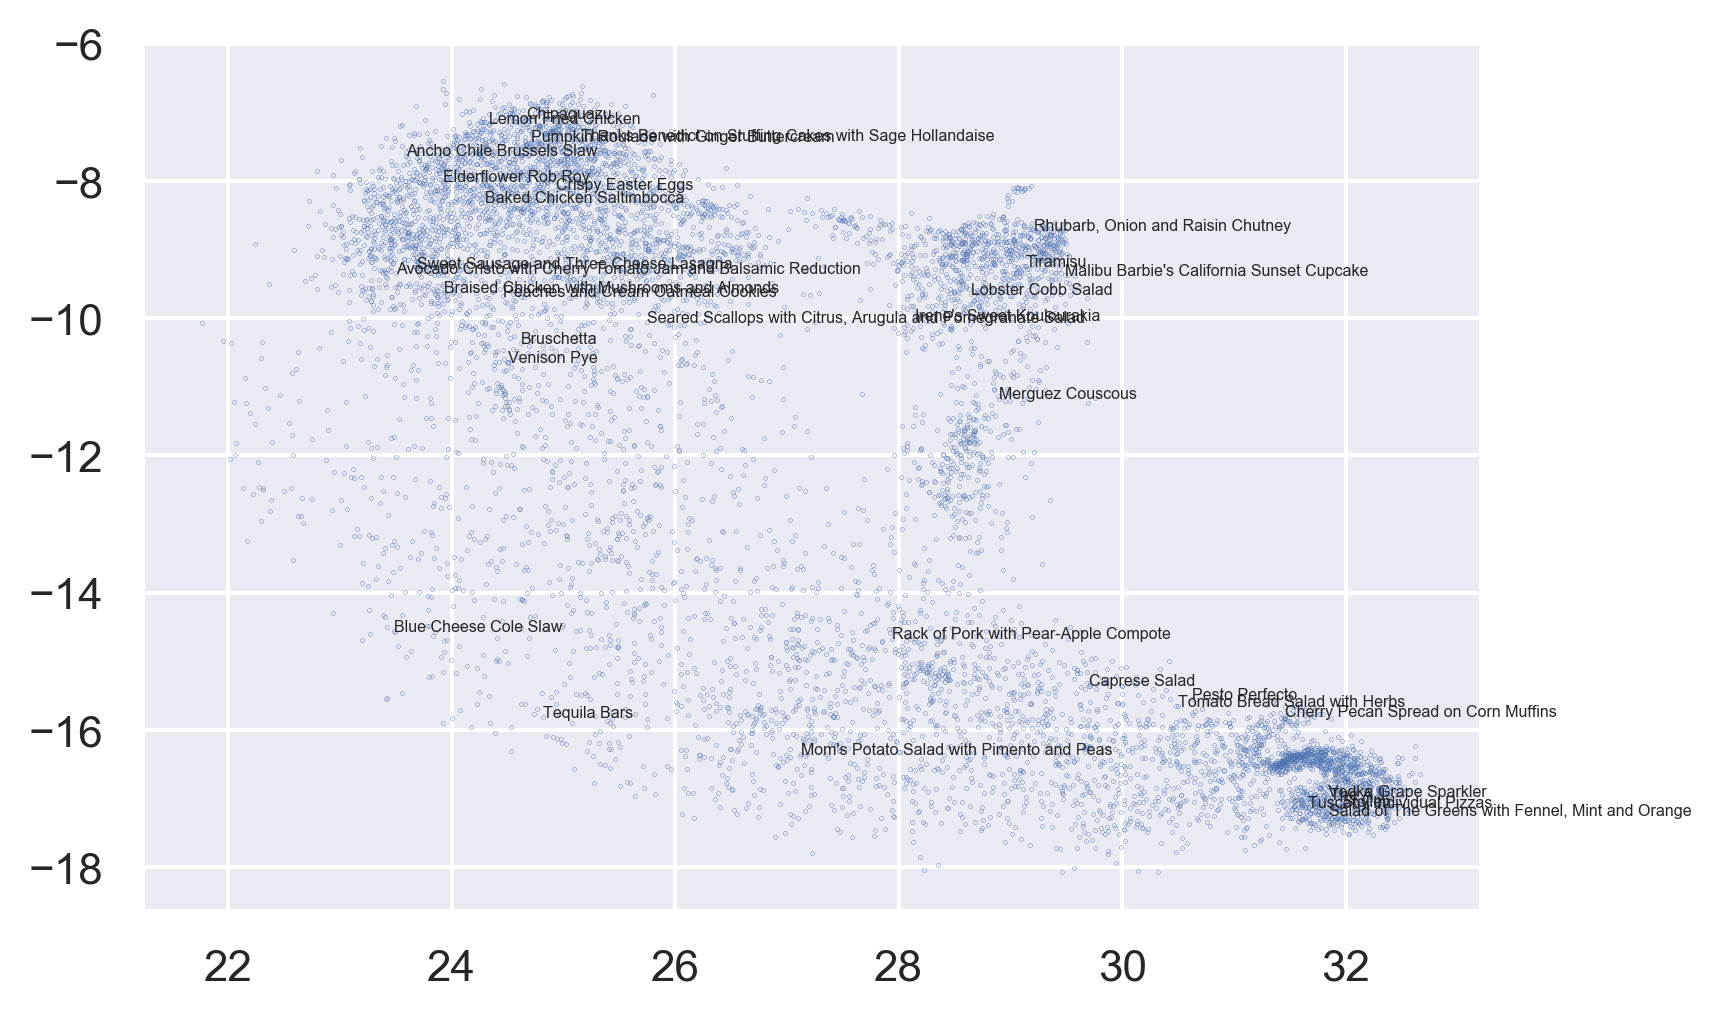

In [53]:
fig, ax = plt.subplots()
titles = data.T.loc[:,"title"]

for i in range(3000):
    if random.randint(1,89) == 1:
        ax.annotate(titles[i], (embedding[:, 0][i], embedding[:, 1][i]), size = 4)
        print(data.loc['title',:][i])
        print(data.loc['ingredients', :][i])
ax.scatter(embedding[:, 0], embedding[:, 1],s = 0.01)

In [ ]:
pickle.dump(embedding, open( "embedding.p", "wb" ))